---
layout: default
title: "Unsupervised Learning - Dimensionality Reduction"
categories: Unsupervised
permalink: /ML21/
order: 21
comments: true
---

In [2]:
%pylab --no-import-all inline
plt.rcParams["mathtext.fontset"] = "cm"
import matplotlib.cm as cm

Populating the interactive namespace from numpy and matplotlib


# Dimensionality Reduction
When training a learning algorithm on a training set with hundreds or thousands of features, it is very likely that some of them are redundant as in <a href="#redundantlen">the figure below</a>. Two features do not need to be encoding for the same property to be redundant, it is sufficient that they are highly correlated.

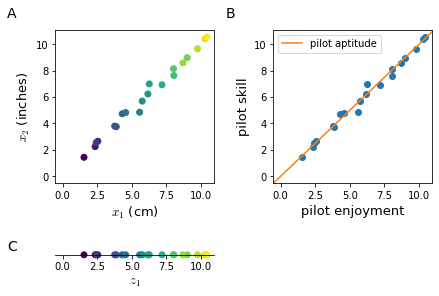

In [85]:
x = np.linspace(1, 10, 20)
noise = np.random.rand(20)

fig = plt.figure(constrained_layout=True)
gs = fig.add_gridspec(2, 2, height_ratios=[3, 1])
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1], sharey=ax1, sharex=ax1)
ax3 = fig.add_subplot(gs[1, 0], sharex=ax2)

ax1.scatter(x+noise, x+noise[::-1], marker='o', c=x)
ax1.set_ylabel('$x_2$ (inches)', fontsize=13)
ax1.set_xlabel('$x_1$ (cm)', fontsize=13)

ax2.scatter(x+noise, x+noise[::-1], marker='o')
ax2.set_ylabel('pilot skill', fontsize=13)
ax2.set_xlabel('pilot enjoyment', fontsize=13)
ax2.axline((0, 0), slope=1, c='C1', label='pilot aptitude')
ax2.legend()

ax3.scatter(x+noise, np.zeros_like(x), c=x)
ax3.spines['left'].set_visible(False)
ax3.spines['top'].set_visible(False)
ax3.spines['right'].set_visible(False)
ax3.spines['bottom'].set_position('center')
ax3.set_yticks([])
ax3.set_xlabel('$z_1$', fontsize=13)

ax1.text(-4, 12, 'A', fontsize=14)
ax2.text(-4, 12, 'B', fontsize=14)
ax3.text(-4, 0.01, 'C', fontsize=14);

<i id="redundantlen">Two redundant features (same property in different units of measure, the relationship not being perfectly linear is due to different approximation of the measurements) (A); Two redundant features measuring different but highly correlated properties (B); features space of panel A collapsed in (projected on) a single dimension (C) </i>

Dimensionality reduction is not limited to bi-dimensional data; a typical task of dimensionality reduction could be to reduce a $\mathbb{R}^{1000}$ to a $\mathbb{R}^{100}$ feature space

Dimensionality reduction is used for two main purposes:
* **data compression**
    * reduce memory / disk space needed to store data
    * speed up learning algorithms: dimensionality reduction should only be applied to the training set; furthermore it is advisable to not run dimensionality reduction on the dataset *a priori*, you should start with raw data and apply dimensionality reduction only the learning process doesn't turn out as desired.
* **data visualization** for visualization purposes, we reduce the number of features to 2 or 3, which are the maximum number of dimensions in a plot.

People sometimes use dimensionality reduction algorithms (e.g. PCA) to prevent overfitting, this might work but it is not a good way to address overfitting and instead regularization should be used. Dimensionality reduction algorithms loose some information and while in most cases it might work, that information could be valuable to a learning algorithm.

##  Principal Component Analysis
Principal Component Analysis (PCA) is the most common algorithm for dimensionality reduction.

If we want to reduce data from 2 dimensions to 1 dimension (<a href="#pcaline">the figure below</a>), the goal of PCA is to find a vector $u^{(1)} \in \mathbb{R^n}$ onto which to project the data so as to minimize the projection error.

In [105]:
xv = np.linspace(1, 3, 6)
noise = np.random.rand(6) -.5
xv, yv = xv+noise, xv+noise[::-1]

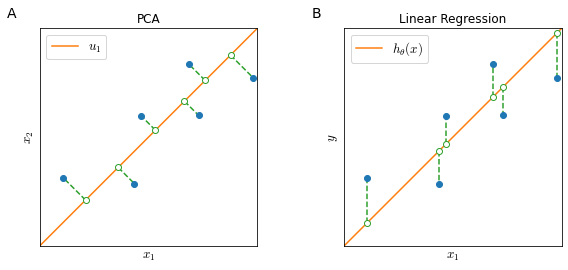

In [142]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
ax1, ax2 = axes

for xori, xp, yp in zip(x, xv, yv):
    l = np.array([3, 3])
    coords = np.array([xp, yp])
    p = l * np.dot(coords, l) / np.dot(l, l)
    ax1.plot(*np.c_[p, coords], marker='o', c='C2', markevery=[0], ls='--' ,zorder=-1, markerfacecolor='w')
    ax2.plot([xp, xp], [xp, yp], marker='o', c='C2', markevery=[0], ls='--' ,zorder=-1, markerfacecolor='w')
    
ax1.set_ylabel('$x_2$', fontsize=13)
ax2.set_ylabel('$y$', fontsize=13)
ax1.set_title('PCA')
ax2.set_title('Linear Regression')
ax1.axline((1, 1), slope=1, c='C1', zorder=-2, label='$u_1$')
ax2.axline((1, 1), slope=1, c='C1', zorder=-2, label='$h_\\theta(x)$')

for ax, l in zip(axes, ['A', 'B']):
    ax.set_aspect('equal')
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xlabel('$x_1$', fontsize=13)
    ax.scatter(xv, yv)
    ax.set_xlim(.5, 3.5)
    ax.set_ylim(.5, 3.5)
    ax.text(-0.15, 1.1, l, transform=ax.transAxes, fontsize=14, va='top')
    ax.legend(fontsize=13)

<i id="pcaline">Distance calculation for PCA in the linear case (A) and linear regression (B).</i>

In $n$ dimensions PCA tries to find a surface with a smaller number of dimensions $k$ ($k$ vectors $u^{(1)}, u^{(2)}, \ldots, u^{(k)}$) on which to project the data so that the sum of squares of the projections distance (projection error) is minimized.

### PCA vs Linear Regression
While it may be cosmetically similar, there is substantial difference between PCA and linear regression. 

In linear regression (<a href="#pcaline">figure above</a>, panel B) we try to predict some value $y$ given some input feature $x_1$  and in training linear regression we try to minimize the **vertical distance** between $x_1, y$ points and a straight line.

In PCA (<a href="#pcaline">the figure above</a>, panel A) there is no variable $y$: we try to reduce the dimensionality of a feature space $x_1, x_2$ by minimizing the **projection error** of feature points and a straight line.

## PCA algorithm
### Preprocessing
For PCA to work properly is essential to pre-process data. 

With **mean normalization** we replace each $x_j^{(i)}$ with $x_j - \mu_j$, where 

$$\mu_j = \frac{1}{m}\sum^m_{i=1}x_j^{(i)}$$

If different features are on different scales we need to **scale features** to a comparable range of values 

$$\frac{x_j - \mu_j}{s_j}$$

where $s_j$ is a measure of the range of values of $x_j$, commonly the standard deviation.

### Dimensionality reduction
The objective of PCA is to project a higher number of dimensions $n$ on a lower number of dimensions $k$ (defined by $k$ vectors $ \{u_1, u_2, \ldots, u_k \}$), as shown in <a href="#redundantlen">figure above</a>, panels A and C.

The mathematical proof of this process is rather complex but the procedure is instead quite simple.

The first step in the PCA algorithm is the calculation of the [covariance matrix](https://en.wikipedia.org/wiki/Covariance_matrix) $\Sigma$, which will be an $n \times n$ matrix

$$
\Sigma = \frac{1}{m} \sum^n_{i=1} \left ( x^{(i)} \right )\left ( x^{(i)} \right )^T
$$

and then calculate the [eigenvectors](https://en.wikipedia.org/wiki/Eigenvalues_and_eigenvectors) of $\Sigma$. Since $\Sigma$ is a [symmetric positive definite matrix](https://en.wikipedia.org/wiki/Definite_symmetric_matrix) you usually calculate the eigenvectors with [Singular Value Decomposition](https://en.wikipedia.org/wiki/Singular_value_decomposition) (SVD). 

SVD outputs three matrices $U, S, V$. To identify the new vector space are only interested in the $U$ matrix. This will also be an $n \times n$ matrix, whose columns represents the vectors $u$.

$$
U=
\begin{bmatrix}
| & | &  & | \\
u^{(1)} & u^{(2)} & \cdots & u^{(n)} \\
| & | &  & | \\
\end{bmatrix} \in \mathbb{R}^{n \times n}
$$

To obtain the reduced space described by $k$ vectors $u$ we just take the first $k$ columns from the matrix $U$.

$$
U_\text{reduce}=
\begin{bmatrix}
| & | &  & | \\
u^{(1)} & u^{(2)} & \cdots & u^{(k)} \\
| & | &  & | \\
\end{bmatrix} \in \mathbb{R}^{n \times k}
$$

And the projection of features $x \in \mathbb{R}^n$ to components $z \in \mathbb{R}^k$ is calculated as 

$$
z = U_\text{reduce}^T x 
$$

and since $U_\text{reduce}^T \in \mathbb{R}^{k \times n}$ and $x \in \mathbb{R}^{n \times 1}$, then $z \in \mathbb{R}^{k \times 1}$ or $z \in \mathbb{R}^k$

## Reconstruction from compressed data
Reconstruction from projected data $z$ to original data $x$ is possible but with some loss of information. 

In order to get an approximation of the original feature vector $x$ we can 

$$
x \approx U_\text{reduce}^T z
$$

However, all points of $x$ will be along the $u$ vector and we will lose exactly the information of the projection error (<a href="#reconstruction">figure below</a>). So, the smaller the projection error, the more faithful the reconstruction.

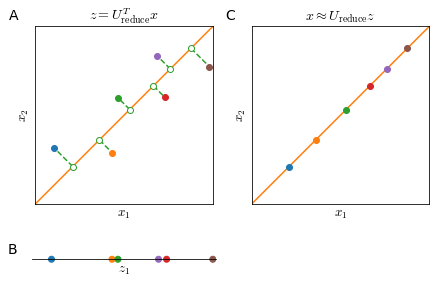

In [141]:
xv = np.linspace(1, 3, 6)
xv, yv = xv+noise, xv+noise[::-1]

fig = plt.figure(constrained_layout=True)
gs = fig.add_gridspec(2, 2, height_ratios=[3, 1])
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1], sharey=ax1, sharex=ax1)
ax3 = fig.add_subplot(gs[1, 0], sharex=ax2)

colors = ['C{}'.format(i) for i in range(10)]
for col, xori, xp, yp in zip(colors, x, xv, yv):
    l = np.array([3, 3])
    coords = np.array([xp, yp])
    p = l * np.dot(coords, l) / np.dot(l, l)
    ax1.plot(xp, yp, ls='none', marker='o', c=col)
    ax1.plot(*np.c_[p, coords], marker='o', c='C2', markevery=[0], ls='--' ,zorder=-1, markerfacecolor='w')
    ax2.plot(*p, marker='o', ls='none' ,zorder=-1)

for ax, l in zip([ax1, ax2], ['A', 'C']):
    ax.axline((1, 1), slope=1, c='C1', zorder=-2)
    ax.set_aspect('equal')
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xlabel('$x_1$', fontsize=13)
    ax.set_ylabel('$x_2$', fontsize=13)
    ax.set_xlim(.5, 3.5)
    ax.set_ylim(.5, 3.5)
    ax.text(-0.15, 1.1, l, transform=ax.transAxes, fontsize=14, va='top')

ax1.set_title('$z=U^T_\\mathrm{reduce}x$', fontsize=14)
ax2.set_title('$x \\approx U_\\mathrm{reduce}z$', fontsize=14)
ax3.scatter(xv, np.zeros_like(xv), c=colors[:6])
ax3.spines['left'].set_visible(False)
ax3.spines['top'].set_visible(False)
ax3.spines['right'].set_visible(False)
ax3.spines['bottom'].set_position('center')
ax3.set_yticks([])
ax3.set_xlabel('$z_1$', fontsize=13)
ax3.text(0.1, 0.01, 'B', fontsize=14);

<i id="reconstruction">Projection of bi-dimensional features $x$ on vector $u$ with projection error as a dashed green line (A); representation of reduced features $z$ (B); reconstruction of approximated features $x$ from $z$ with loss of the projection error information.</i>

## Setting the number of Principal Components
The rule of thumb adopted usually to decide the hyper-parameter $k$ (the number of principal components) is this:

Given the average squared projection error

$$
\frac{1}{m} \sum^m_{i=1} \left \| x^{(i)} - x^{(i)}_\text{approx} \right \|^2
$$

and the total variation in the data

$$
\frac{1}{m} \sum^m_{i=1} \left \| x^{(i)} \right \|^2
$$

Typically, $k$ is chosen to be the smallest that satisfies

$$
\begin{equation}
\frac{\frac{1}{m} \sum^m_{i=1} \left \| x^{(i)} - x^{(i)}_\text{approx} \right \|^2}
{\frac{1}{m} \sum^m_{i=1} \left \| x^{(i)} \right \|^2} \leq 0.01
\end{equation}
\label{eq:pcakcondition} \tag{1}
$$

In other words, $k$ is chosen so that $99\%$ of the variance is retained. Depending on the necessities, $k$ can also be chosen as to retain $95\%$ or $90\%$ of the variance; these two are also quite typical values, but usually $99\%$ is chosen.

In order to calculate $k$, we can proceed by just calculating PCA for each $k \in [1, n]$  until we find $\eqref{eq:pcakcondition}$ satisfied.

Alternatively, we can use the matrix $S$ returned by the $\mathrm{SVD}(\Sigma)$ to calculate the variance efficiently. Where $S$ is

$$
S=\begin{bmatrix}
S_{1,1} & 0 & 0 & 0\\
0 & S_{2,2} & 0 & 0\\
0 & 0 & \ddots & 0\\
0 & 0 & 0 & S_{n, n} \\
\end{bmatrix} \in \mathbb{R}^{n \times n}
$$

then the condition $\mathrm{SVD}(\Sigma)$ for a given $k$ becomes

$$
\begin{equation}
1-\frac{\sum^k_{i=1}S_{i,i}}{\sum^n_{i=1}S_{i,i}} \leq 0.1
\end{equation}
\label{eq:pcakconditionsvd} \tag{2}
$$

Or in other words that the sum of the first $k$ diagonal values divided by all diagonal values is $\geq 0.99$. This means that $\mathrm{SVD}(\Sigma)$ needs to be called only once since once you have $S$ you can check for condition $\eqref{eq:pcakconditionsvd}$ for all values of $k$.